# **Indian Used Bike Price Prediction**

### Dataset Link - https://www.kaggle.com/datasets/saisaathvik/used-bikes-prices-in-india

* Context

  This dataset contains information about approx 32000 used bikes scraped from www.droom.in

* Content

  This dataset comprises bikes a range of all used bikes sold on droom.in. It includes features like power, kilometers drive, Age of the bike etc.

* Acknowledgements

  All data was scraped from www.droom.in using Webscraper.io and Instant Data Scraper tools

* Inspiration

  The aim to model a resale valuation for used bikes and predict the price of used bikes. This can be helpful while selling a used bike or buying a used bike.

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [97]:
df = pd.read_csv("Used_Bikes.csv")
print("Shape:", df.shape)

Shape: (32648, 8)


In [98]:
print("Initial Data Preview:")
df.head(10)

Initial Data Preview:


,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3.0,160.0,Honda
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield
9,Royal Enfield Classic Desert Storm 500cc,88000.0,Delhi,19000.0,Second Owner,7.0,500.0,Royal Enfield


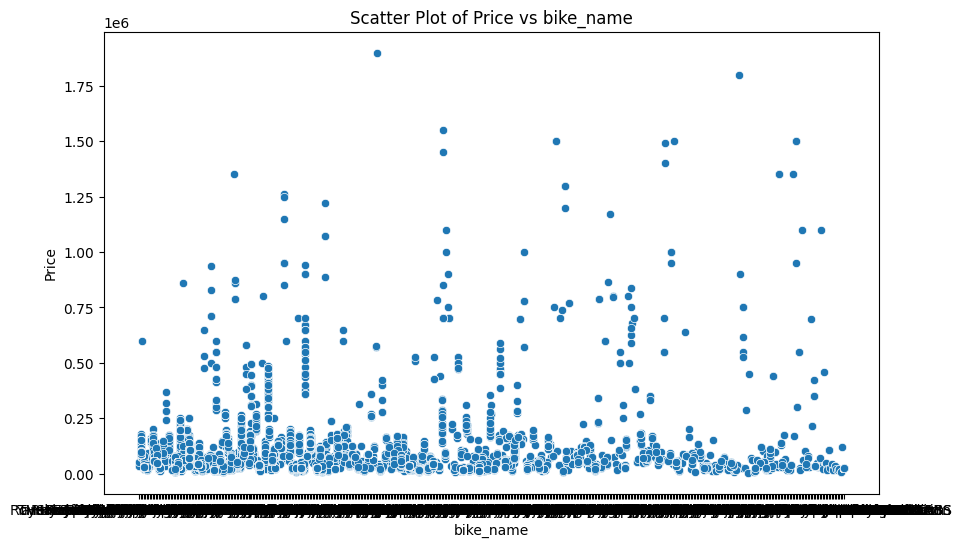

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bike_name', y='price', data=df)
plt.title('Scatter Plot of Price vs bike_name')
plt.xlabel('bike_name')
plt.ylabel('Price')
plt.show()

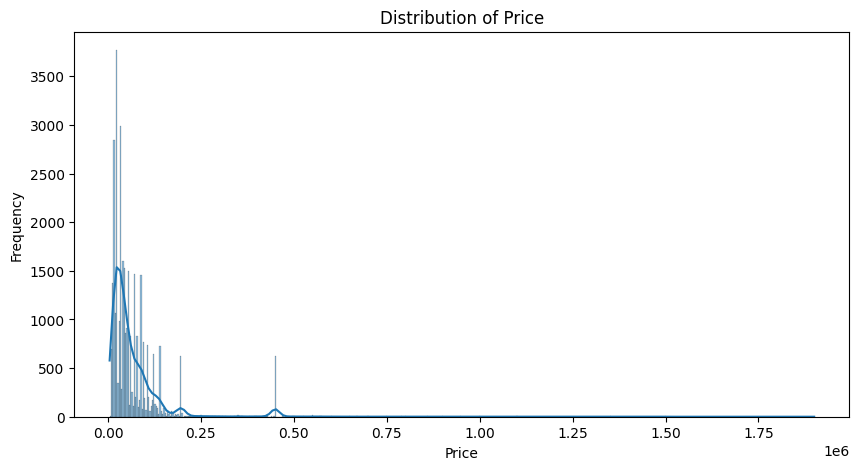

In [100]:
# Distribution of 'price'
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

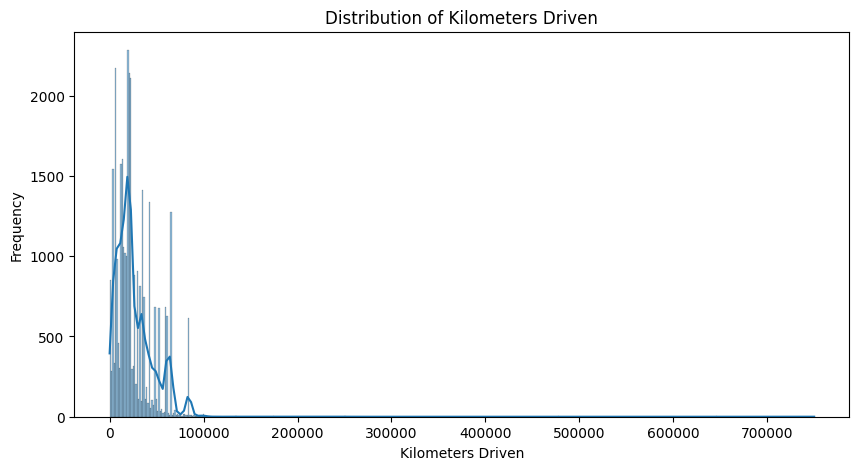

In [101]:
# Distribution of 'kms_driven'
plt.figure(figsize=(10, 5))
sns.histplot(df['kms_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

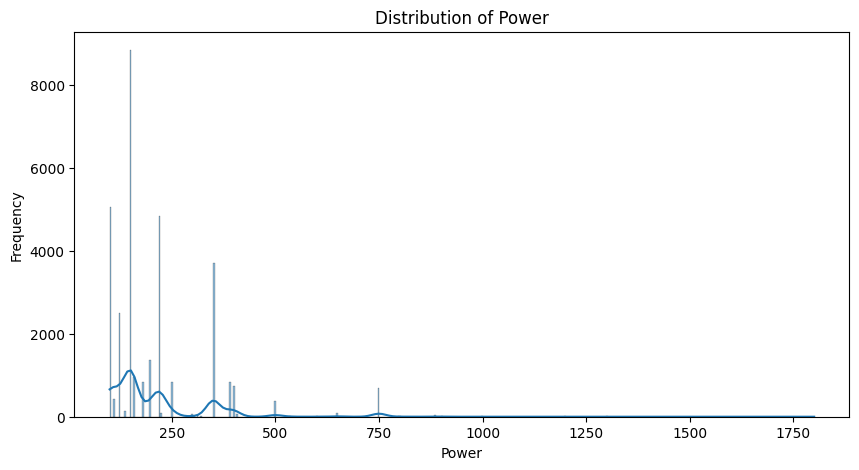

In [102]:
# Distribution of 'power'
plt.figure(figsize=(10, 5))
sns.histplot(df['power'], kde=True)
plt.title('Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

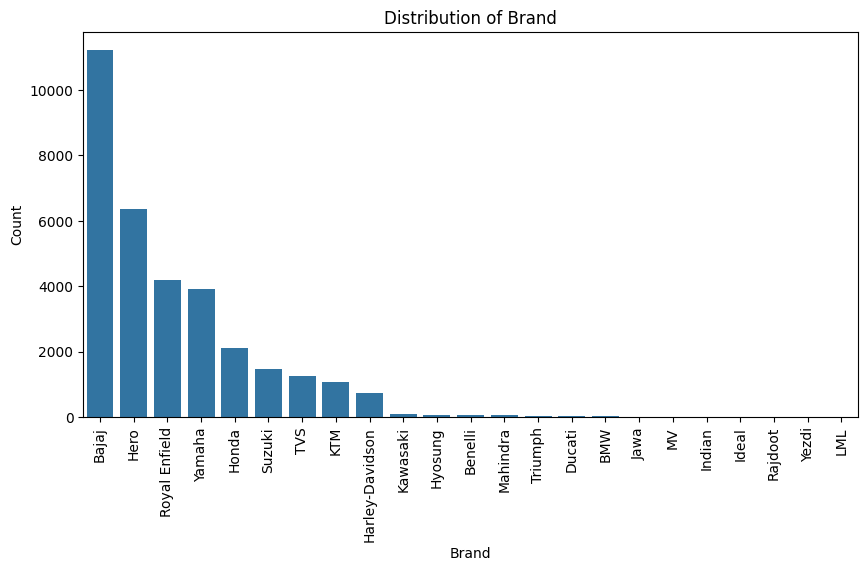

In [103]:
# Distribution of 'brand'
plt.figure(figsize=(10, 5))
sns.countplot(x='brand', data=df, order=df['brand'].value_counts().index)
plt.title('Distribution of Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


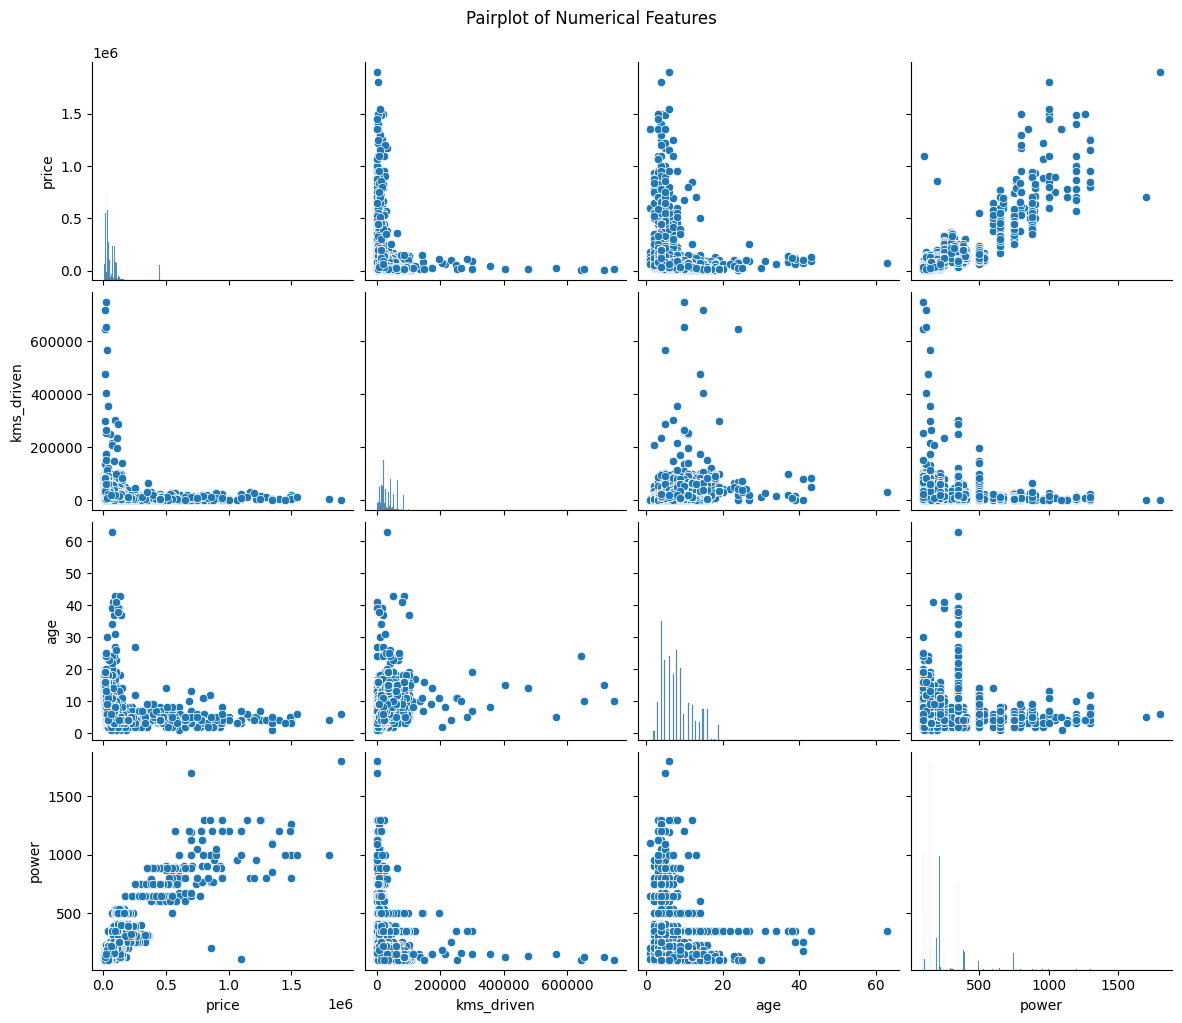

In [104]:
sns.pairplot(df.select_dtypes(include=np.number), height=2.5, aspect=1.2) # Adjusted height and aspect
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# **Apply Pre-Processing**

## 1. Check Missing Values

In [105]:
print("\n🔍 Missing Values:")
df.isnull().sum()


🔍 Missing Values:


,0
bike_name,0
price,0
city,0
kms_driven,0
owner,0
age,0
power,0
brand,0


## 2. Fix inconsistent formatting in categorical columns

In [106]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip().str.lower()
print("Text columns standardized (spaces removed, lowercase).")
df.head(10)

Text columns standardized (spaces removed, lowercase).


,bike_name,price,city,kms_driven,owner,age,power,brand
0,tvs star city plus dual tone 110cc,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs
1,royal enfield classic 350cc,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield
2,triumph daytona 675r,600000.0,delhi,110.0,first owner,8.0,675.0,triumph
3,tvs apache rtr 180cc,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs
4,yamaha fz s v 2.0 150cc-ltd. edition,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha
5,yamaha fzs 150cc,53499.0,delhi,25000.0,first owner,6.0,150.0,yamaha
6,honda cb hornet 160r abs dlx,85000.0,delhi,8200.0,first owner,3.0,160.0,honda
7,hero splendor plus self alloy 100cc,45000.0,delhi,12645.0,first owner,3.0,100.0,hero
8,royal enfield thunderbird x 350cc,145000.0,bangalore,9190.0,first owner,3.0,350.0,royal enfield
9,royal enfield classic desert storm 500cc,88000.0,delhi,19000.0,second owner,7.0,500.0,royal enfield


## 3. Handle Mismatched Data Types

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [108]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [109]:
for col in df.columns:
     try:
         df[col] = pd.to_numeric(df[col])
     except:
         pass
df.head(10)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,tvs star city plus dual tone 110cc,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs
1,royal enfield classic 350cc,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield
2,triumph daytona 675r,600000.0,delhi,110.0,first owner,8.0,675.0,triumph
3,tvs apache rtr 180cc,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs
4,yamaha fz s v 2.0 150cc-ltd. edition,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha
5,yamaha fzs 150cc,53499.0,delhi,25000.0,first owner,6.0,150.0,yamaha
6,honda cb hornet 160r abs dlx,85000.0,delhi,8200.0,first owner,3.0,160.0,honda
7,hero splendor plus self alloy 100cc,45000.0,delhi,12645.0,first owner,3.0,100.0,hero
8,royal enfield thunderbird x 350cc,145000.0,bangalore,9190.0,first owner,3.0,350.0,royal enfield
9,royal enfield classic desert storm 500cc,88000.0,delhi,19000.0,second owner,7.0,500.0,royal enfield


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


## 4. Convert categorical columns into numbers

### Label Encoding


In [111]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'brand' and 'city'
label_encoder = LabelEncoder()
df['Bike_name_encoded'] = label_encoder.fit_transform(df['bike_name'])
df['brand_encoded'] = label_encoder.fit_transform(df['brand'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['owner_encoded'] = label_encoder.fit_transform(df['owner'])

print("Label Encoding applied to 'brand' and 'city' and 'owner' and 'bike_name")
display(df.head())

Label Encoding applied to 'brand' and 'city' and 'owner' and 'bike_name


,bike_name,price,city,kms_driven,owner,age,power,brand,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded
0,tvs star city plus dual tone 110cc,35000.0,ahmedabad,17654.0,first owner,3.0,110.0,tvs,411,20,6,0
1,royal enfield classic 350cc,119900.0,delhi,11000.0,first owner,4.0,350.0,royal enfield,293,17,118,0
2,triumph daytona 675r,600000.0,delhi,110.0,first owner,8.0,675.0,triumph,360,19,118,0
3,tvs apache rtr 180cc,65000.0,bangalore,16329.0,first owner,4.0,180.0,tvs,386,20,44,0
4,yamaha fz s v 2.0 150cc-ltd. edition,80000.0,bangalore,10000.0,first owner,3.0,150.0,yamaha,428,21,44,0


### Dropping Original Categorical Columns


In [112]:
# Drop original categorical columns after encoding
df = df.drop(['brand', 'city', 'owner', 'bike_name'], axis=1) # 'owner' is now dropped after being encoded

print("Original categorical columns dropped")
display(df.head())

Original categorical columns dropped


,price,kms_driven,age,power,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded
0,35000.0,17654.0,3.0,110.0,411,20,6,0
1,119900.0,11000.0,4.0,350.0,293,17,118,0
2,600000.0,110.0,8.0,675.0,360,19,118,0
3,65000.0,16329.0,4.0,180.0,386,20,44,0
4,80000.0,10000.0,3.0,150.0,428,21,44,0


## 5. Create new useful features:

New Feature	Formula	Meaning

* bike_age	current_year - year	Older bikes → lower price
* km_per_year	kms_driven / bike_age	More usage → lower price

In [113]:
current_year = pd.Timestamp('now').year
df['bike_age'] = current_year - df['age'] # Assuming 'age' column represents the year of the bike

df['km_per_year'] = df['kms_driven'] / (df['bike_age'] + 1e-6)

print("New features 'bike_age' and 'km_per_year' created.")
display(df.head())

New features 'bike_age' and 'km_per_year' created.


,price,kms_driven,age,power,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded,bike_age,km_per_year
0,35000.0,17654.0,3.0,110.0,411,20,6,0,2022.0,8.730959
1,119900.0,11000.0,4.0,350.0,293,17,118,0,2021.0,5.442850
2,600000.0,110.0,8.0,675.0,360,19,118,0,2017.0,0.054536
3,65000.0,16329.0,4.0,180.0,386,20,44,0,2021.0,8.079664
4,80000.0,10000.0,3.0,150.0,428,21,44,0,2022.0,4.945598


## 6. Apply Normalization (Min-Max scaling)

* Model Requirements: Most regression models predict the raw, unscaled target value. Scaling the target requires you to unscale the predictions later to get the actual price, adding an extra step and potential source of error.

* Interpretability: Predicting the actual price is usually more intuitive and easier to interpret than predicting a scaled price.

* Algorithm Behavior: While some algorithms might benefit from a scaled target, it's less critical than scaling features. Feature scaling helps algorithms that are sensitive to the magnitude of features (like gradient descent-based methods or distance-based algorithms) converge faster and perform better. The target variable doesn't directly influence the feature space in the same way.

In [114]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols_to_normalize = df.select_dtypes(include=np.number).columns.tolist()
if 'price' in numerical_cols_to_normalize:
    numerical_cols_to_normalize.remove('price')

scaler = MinMaxScaler()

df[numerical_cols_to_normalize] = scaler.fit_transform(df[numerical_cols_to_normalize])

print("Numerical features normalized using Min-Max scaling.")
display(df.head())

Numerical features normalized using Min-Max scaling.


,price,kms_driven,age,power,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded,bike_age,km_per_year
0,35000.0,0.023537,0.032258,0.005882,0.880086,0.909091,0.013575,0.0,0.967742,0.023456
1,119900.0,0.014665,0.048387,0.147059,0.627409,0.772727,0.266968,0.0,0.951613,0.014622
2,600000.0,0.000145,0.112903,0.338235,0.770878,0.863636,0.266968,0.0,0.887097,0.000145
3,65000.0,0.021771,0.048387,0.047059,0.826552,0.909091,0.099548,0.0,0.951613,0.021706
4,80000.0,0.013332,0.032258,0.029412,0.916488,0.954545,0.099548,0.0,0.967742,0.013286


### Show summary statistics of the scaled DataFrame

In [115]:
print("\nSummary Statistics of Scaled DataFrame:")
display(df.describe())


Summary Statistics of Scaled DataFrame:


,price,kms_driven,age,power,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded,bike_age,km_per_year
count,3.264800e+04,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,0.035125,0.113681,0.066771,0.401213,0.372991,0.392758,0.055787,0.886319,0.035120
std,9.071860e+04,0.029611,0.065027,0.079076,0.312781,0.368657,0.218178,0.187462,0.065027,0.029663
min,4.400000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+04,0.015999,0.064516,0.029412,0.109208,0.000000,0.266968,0.000000,0.854839,0.015967
50%,4.300000e+04,0.027163,0.096774,0.029412,0.325482,0.227273,0.352941,0.000000,0.903226,0.027109
75%,8.000000e+04,0.046665,0.145161,0.070588,0.638116,0.772727,0.581448,0.000000,0.935484,0.046875
max,1.900000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Handle Outliers (IQR method)

In [116]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
              np.where(df[col] < lower, lower, df[col]))
print("Outliers capped using IQR.")
df.head(10)

Outliers capped using IQR.


,price,kms_driven,age,power,Bike_name_encoded,brand_encoded,city_encoded,owner_encoded,bike_age,km_per_year
0,35000.0,0.023537,0.032258,0.005882,0.880086,0.909091,0.013575,0.0,0.967742,0.023456
1,119900.0,0.014665,0.048387,0.132353,0.627409,0.772727,0.266968,0.0,0.951613,0.014622
2,162500.0,0.000145,0.112903,0.132353,0.770878,0.863636,0.266968,0.0,0.887097,0.000145
3,65000.0,0.021771,0.048387,0.047059,0.826552,0.909091,0.099548,0.0,0.951613,0.021706
4,80000.0,0.013332,0.032258,0.029412,0.916488,0.954545,0.099548,0.0,0.967742,0.013286
5,53499.0,0.033332,0.080645,0.029412,0.933619,0.954545,0.266968,0.0,0.919355,0.033266
6,85000.0,0.010932,0.032258,0.035294,0.400428,0.272727,0.266968,0.0,0.967742,0.010894
7,45000.0,0.016859,0.032258,0.000000,0.366167,0.227273,0.266968,0.0,0.967742,0.016800
8,145000.0,0.012252,0.032258,0.132353,0.693790,0.772727,0.099548,0.0,0.967742,0.012210
9,88000.0,0.025332,0.096774,0.132353,0.646681,0.772727,0.266968,0.0,0.903226,0.025294


In [117]:
print("New shape after removal:", df.shape)

New shape after removal: (32648, 10)


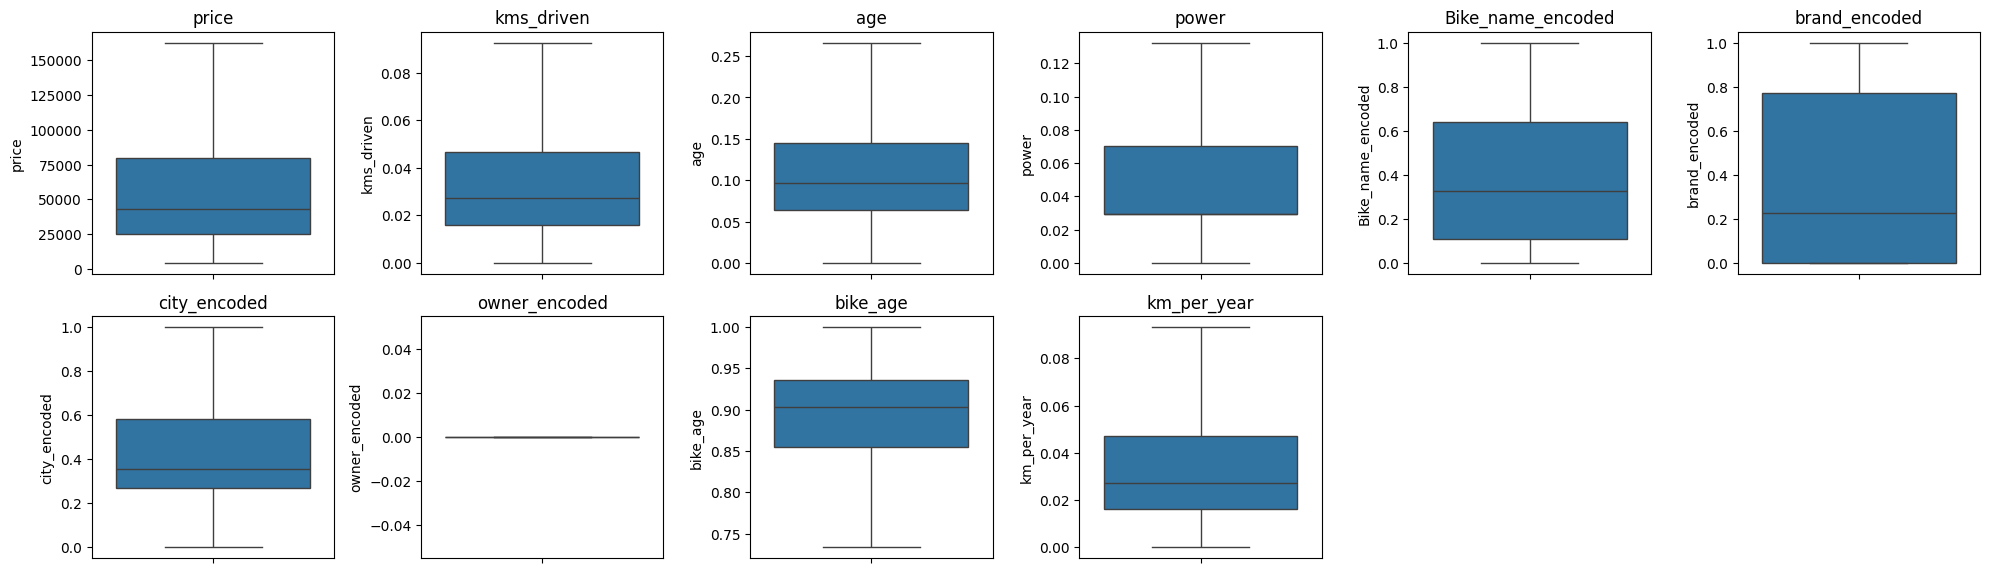

In [118]:
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20,20))
for i, col in enumerate(num_cols):
    plt.subplot(7, 6, i + 1) # Adjust subplot grid size as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## 8. Save and download pre-processed dataset

In [119]:
from google.colab import files

# Save the DataFrame to a CSV file
output_filename = 'Cleaned_Used_bike_Dataset.csv'
df.to_csv(output_filename, index=False)

# Generate a download link for the file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Split dataset**

In [120]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# 'price' is the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (26118, 9)
Shape of X_test: (6530, 9)
Shape of y_train: (26118,)
Shape of y_test: (6530,)


# **Apply Different Regression models**

## 1. linear Regression model

Linear Regression

How it works: Linear Regression finds the best-fitting straight line (or hyperplane in higher dimensions) that describes the relationship between the input features and the target variable. It tries to minimize the difference between the actual and predicted values by adjusting the line's slope and intercept.

Real-world example: Predicting the price of a house based on its size and number of bedrooms. The model finds a linear equation that relates these features to the price.

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [122]:
y_pred = linear_reg_model.predict(X_test)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 230671125.80
Root Mean Squared Error (RMSE): 15187.86
R-squared (R2): 0.88


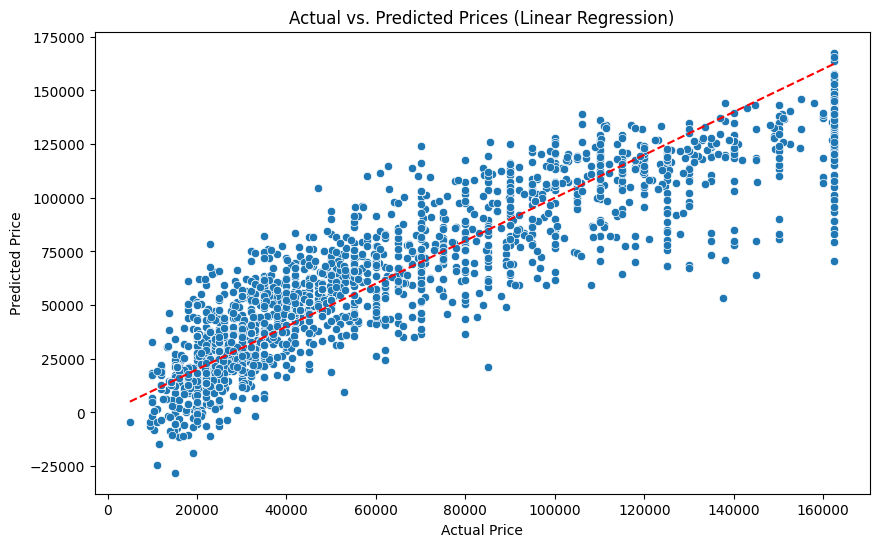

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6 ))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.show()

## 2. Decision Tree Regressor

### Decision Tree Regressor

**How it works:** A Decision Tree Regressor makes predictions by splitting the data into smaller and smaller subsets based on the values of the input features. It forms a tree-like structure where each internal node represents a test on a feature, and each leaf node represents a predicted value.

**Real-world example:** Deciding whether to approve a loan application based on factors like credit score, income, and employment history. The tree makes a series of decisions based on these factors to arrive at a decision (e.g., approve or deny, or in regression, a risk score).

In [125]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42) # Using random_state for reproducibility

decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [126]:
y_pred_dt = decision_tree_reg.predict(X_test)

In [127]:
# Calculate evaluation metrics for Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")


Decision Tree Regressor Model Performance:
Mean Squared Error (MSE): 45256223.66
Root Mean Squared Error (RMSE): 6727.27
R-squared (R2): 0.98


## 3. Random Forest Regressor

### Random Forest Regressor

**How it works:** A Random Forest Regressor is an ensemble of multiple decision trees. It builds several decision trees on different subsets of the data and features, and then averages their predictions to produce a more robust and accurate prediction.

**Real-world example:** Predicting the likelihood of a machine failure based on sensor readings. By combining the predictions of many decision trees, a Random Forest can provide a more reliable estimate of failure risk.

In [128]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
y_pred_rf = random_forest_reg.predict(X_test)

In [130]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


Random Forest Regressor Model Performance:
Mean Squared Error (MSE): 27714669.77
Root Mean Squared Error (RMSE): 5264.47
R-squared (R2): 0.99


## 4. XGBoost

### XGBoost Regressor

**How it works:** XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm that builds trees sequentially. Each new tree tries to correct the errors made by the previous trees. It uses various techniques to improve performance and prevent overfitting.

**Real-world example:** Predicting customer lifetime value based on their purchase history and demographics. XGBoost can capture complex interactions between features to make accurate predictions.

In [131]:
import xgboost as xgb

xgboost_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # objective for regression, random_state for reproducibility

print("Training XGBoost model...")
xgboost_reg.fit(X_train, y_train)
print("XGBoost model training complete.")

Training XGBoost model...
XGBoost model training complete.


In [132]:
y_pred_xgb = xgboost_reg.predict(X_test)


In [133]:
# Calculate evaluation metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Model Performance:")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")


XGBoost Regressor Model Performance:
Mean Squared Error (MSE): 30458172.22
Root Mean Squared Error (RMSE): 5518.89
R-squared (R2): 0.98


## Compare performance of each model

In [134]:
import pandas as pd

# Create a dictionary to store the performance metrics for the selected models
performance_metrics_subset = {
    'Model': [],
    'MSE': [],
    'RMSE': [],
    'R-squared': []
}

# Add metrics for the specified models if they are available
if 'mse' in locals():
    performance_metrics_subset['Model'].append('Linear Regression')
    performance_metrics_subset['MSE'].append(mse)
    performance_metrics_subset['RMSE'].append(rmse)
    performance_metrics_subset['R-squared'].append(r2)

if 'mse_dt' in locals():
    performance_metrics_subset['Model'].append('Decision Tree Regressor')
    performance_metrics_subset['MSE'].append(mse_dt)
    performance_metrics_subset['RMSE'].append(rmse_dt)
    performance_metrics_subset['R-squared'].append(r2_dt)

if 'mse_rf' in locals():
    performance_metrics_subset['Model'].append('Random Forest Regressor')
    performance_metrics_subset['MSE'].append(mse_rf)
    performance_metrics_subset['RMSE'].append(rmse_rf)
    performance_metrics_subset['R-squared'].append(r2_rf)

if 'mse_xgb' in locals():
    performance_metrics_subset['Model'].append('XGBoost Regressor')
    performance_metrics_subset['MSE'].append(mse_xgb)
    performance_metrics_subset['RMSE'].append(rmse_xgb)
    performance_metrics_subset['R-squared'].append(r2_xgb)


# Create a pandas DataFrame from the performance metrics dictionary
performance_df = pd.DataFrame(performance_metrics_subset)

# Sort the DataFrame by R-squared in descending order
performance_df_sorted = performance_df.sort_values(by='R-squared', ascending=False)

# Reset index and add a numbering column
performance_df_sorted = performance_df_sorted.reset_index(drop=True)
performance_df_sorted.index = performance_df_sorted.index + 1 # Start numbering from 1

print("\nPerformance Comparison (Linear Regression, Decision Tree, Random Forest, XGBoost):")
display(performance_df_sorted)


Performance Comparison (Linear Regression, Decision Tree, Random Forest, XGBoost):


,Model,MSE,RMSE,R-squared
1,Random Forest Regressor,2.771467e+07,5264.472411,0.985308
2,XGBoost Regressor,3.045817e+07,5518.892301,0.983853
3,Decision Tree Regressor,4.525622e+07,6727.274609,0.976008
4,Linear Regression,2.306711e+08,15187.861133,0.877713


In [135]:
import joblib
from google.colab import files

# Define a dictionary of the models to save
# Ensure the model variables (linear_reg_model, decision_tree_reg, random_forest_reg, xgboost_reg) are available
models_to_save = {
    'linear_regression_model_for_Used_bike_Price.joblib': linear_reg_model,
    'decision_tree_regressor_for_Used_bike_Price.joblib': decision_tree_reg,
    'random_forest_regressor_for_Used_bike_Price.joblib': random_forest_reg,
    'xgboost_regressor_for_Used_bike_Price.joblib': xgboost_reg
}

# Save each model and offer a download link
for filename, model in models_to_save.items():
    try:
        joblib.dump(model, filename)
        print(f"Model '{filename}' saved successfully.")
        # Provide download link
        files.download(filename)
    except NameError:
        print(f"Error: Model variable for '{filename}' not found. Please ensure the model has been trained.")
    except Exception as e:
        print(f"An error occurred while saving or downloading {filename}: {e}")

Model 'linear_regression_model_for_Used_bike_Price.joblib' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 'decision_tree_regressor_for_Used_bike_Price.joblib' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 'random_forest_regressor_for_Used_bike_Price.joblib' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model 'xgboost_regressor_for_Used_bike_Price.joblib' saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

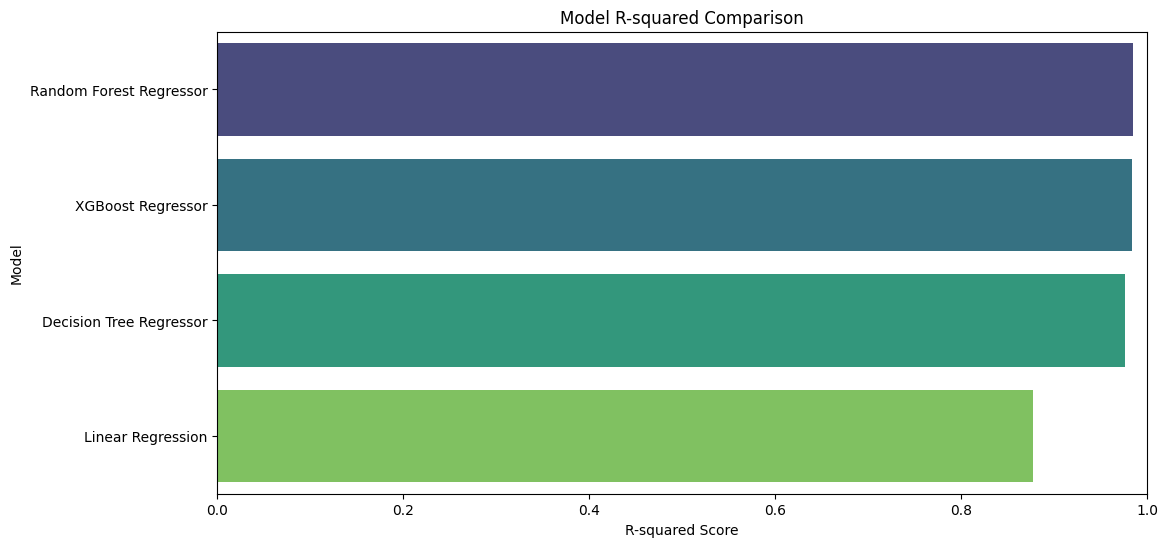

In [137]:
models_to_plot = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']

performance_df_subset_for_plot = performance_df_sorted[performance_df_sorted['Model'].isin(models_to_plot)].copy()

plt.figure(figsize=(12, 6))
sns.barplot(x='R-squared', y='Model', hue='Model', data=performance_df_subset_for_plot.sort_values(by='R-squared', ascending=False), palette='viridis', legend=False)
plt.title('Model R-squared Comparison')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

/tmp/ipython-input-3109863750.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=performance_df_subset_for_plot.sort_values(by='RMSE', ascending=True), palette='magma')


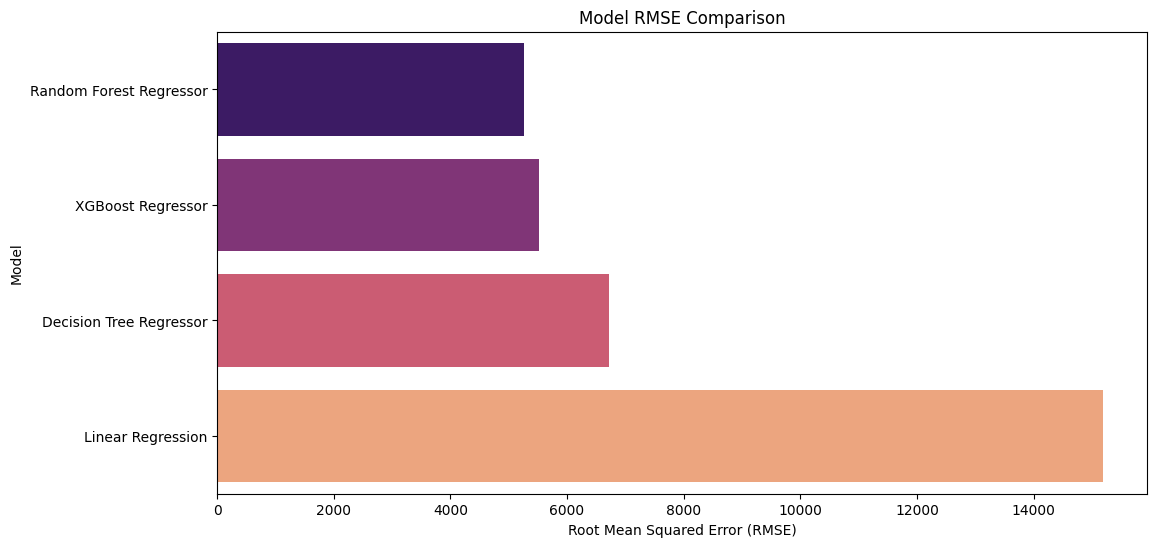

In [140]:

models_to_plot = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']

performance_df_subset_for_plot = performance_df_sorted[performance_df_sorted['Model'].isin(models_to_plot)].copy()

plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='Model', data=performance_df_subset_for_plot.sort_values(by='RMSE', ascending=True), palette='magma')
plt.title('Model RMSE Comparison')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.show()

/tmp/ipython-input-3051809201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Model', data=performance_df_subset_for_plot.sort_values(by='MSE', ascending=True), palette='plasma')


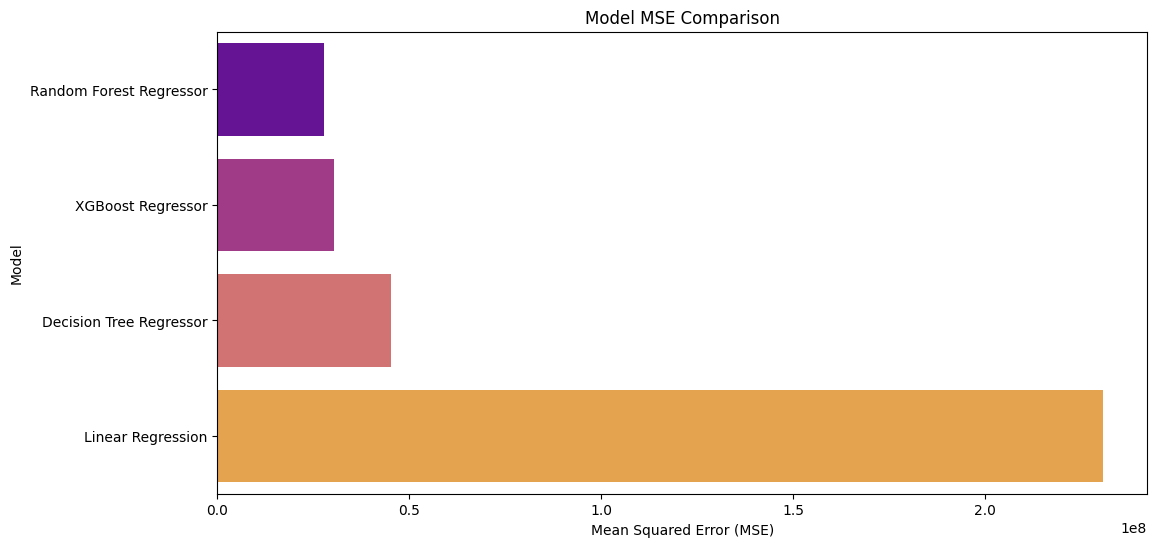

In [141]:

models_to_plot = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor']

performance_df_subset_for_plot = performance_df_sorted[performance_df_sorted['Model'].isin(models_to_plot)].copy()

plt.figure(figsize=(12, 6))
sns.barplot(x='MSE', y='Model', data=performance_df_subset_for_plot.sort_values(by='MSE', ascending=True), palette='plasma')
plt.title('Model MSE Comparison')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.show()